In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential

from PIL import Image

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Resizing
from tensorflow.keras.optimizers import Adam

import os

C:\Users\micha\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = 'data/train/'
test = 'data/test/'

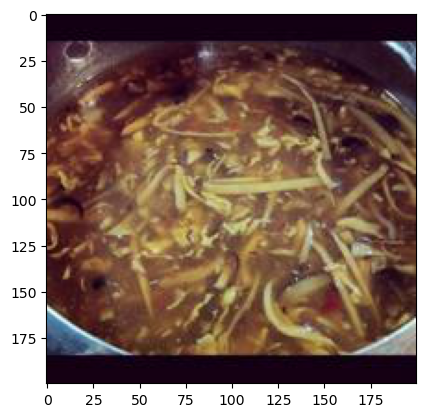

In [4]:
plt.imshow(plt.imread(train + 'B/TRAIN.1_BIODEG_ORI_0.jpg'));

In [5]:
plt.imread(train + 'B/TRAIN.1_BIODEG_ORI_0.jpg').shape

(200, 200, 3)

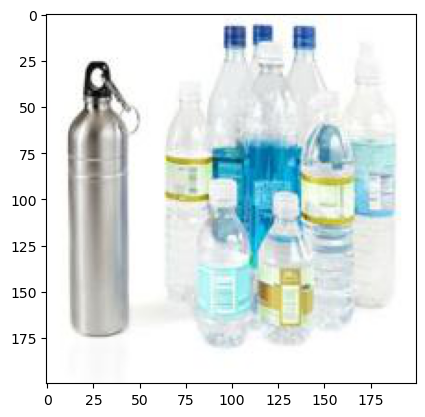

In [6]:
plt.imshow(plt.imread(test + 'N/TEST_NBIODEG_ORI_0.jpg'));

In [7]:
plt.imread(test + 'N/TEST_NBIODEG_ORI_0.jpg').shape

(200, 200, 3)

### Baseline
- zero classifier baseline is about 50%

In [8]:
len(os.listdir('data/train/B/')) / (len(os.listdir('data/train/B/')) + len(os.listdir('data/train/N/')))

0.50000834404152

In [9]:
len(os.listdir('data/test/B/')) / (len(os.listdir('data/test/B/')) + len(os.listdir('data/test/N/')))

0.500029891791714

### Modeling

In [10]:
train_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

In [11]:
# train is about 78% and test is about 22% of total image count

train_data = train_gen.flow_from_directory(
    train,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test,
    class_mode='binary'
)

Found 59923 images belonging to 2 classes.
Found 16726 images belonging to 2 classes.


In [12]:
# model building

model = Sequential()

model.add(Resizing(
    height = 50, 
    width = 50, 
    interpolation="bilinear", 
    crop_to_aspect_ratio=False
))

model.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2,2)
))

model.add(Conv2D(
    filters=10,
    kernel_size=(3,3),
    activation='relu'
))

model.add(MaxPool2D(
    pool_size=(2,2)
))

model.add(Flatten())
model.add(Dense(
    units=100,
    activation='relu'
))

# output layer
model.add(Dense(
    units=1,
    activation='sigmoid'
))

In [13]:
# compile

model.compile(loss='bce', metrics=['acc'])

In [14]:
# fit
history = model.fit(
    train_data,
    batch_size = 5,
    validation_data = test_data,
    validation_batch_size = 5
)

1873/1873 [==============================] - 755s 403ms/step - loss: 0.3217 - acc: 0.8672 - val_loss: 0.3962 - val_acc: 0.8200


## Visuals

In [15]:
train_preds = model.predict(train_data)
test_preds = model.predict(test_data)

523/523 [==============================] - 158s 303ms/step


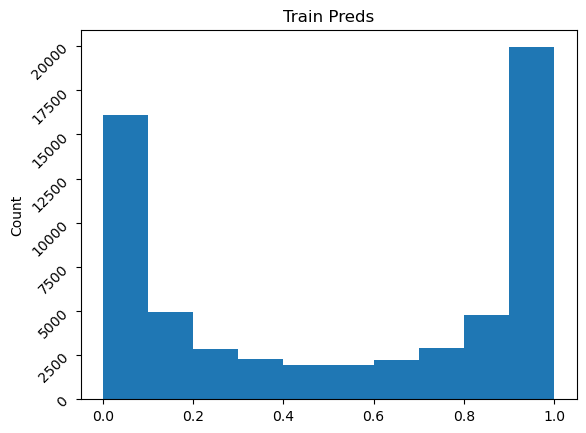

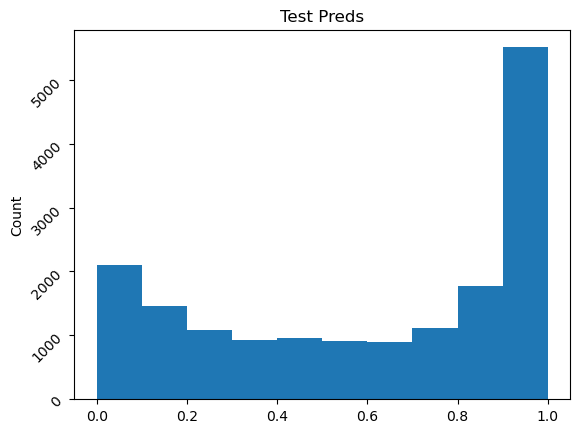

In [19]:
ax = plt.axes()

plt.hist(train_preds);
ax.set_title('Train Preds')
ax.set_ylabel('Count')
plt.yticks(rotation=45)

plt.show();

ax = plt.axes()

plt.hist(test_preds);
ax.set_title('Test Preds');
ax.set_ylabel('Count');
plt.yticks(rotation=45);

plt.show();

In [26]:
model.add(Flatten(input_shape=(28,28)))

### Efficient Net

In [30]:
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_directory(
    train,
    class_mode='binary',
    target_size=(224,224))

test_data = test_gen.flow_from_directory(
    test,
    class_mode='binary',
    target_size=(224,224))

Found 59923 images belonging to 2 classes.
Found 16726 images belonging to 2 classes.


In [31]:
effnet = EfficientNetB0(include_top=False, weights='imagenet')

In [32]:
len(effnet.layers)

238

In [33]:
effnet.trainable = False
effnet.trainable

False

In [37]:
model = Sequential()
model.add(effnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# compile

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='bce',
    metrics=['acc']
)

In [39]:
# fit

history = model.fit(
    train_data,
    batch_size=32,
    validation_data=test_data,
    validation_batch_size=32,
    epochs=1
)

1873/1873 [==============================] - 925s 489ms/step - loss: 0.2654 - acc: 0.9466 - val_loss: 0.2174 - val_acc: 0.9294


In [ ]:
# effnet.summary()

In [41]:
train_preds = model.predict(train_data)
test_preds = model.predict(test_data)

523/523 [==============================] - 202s 385ms/step


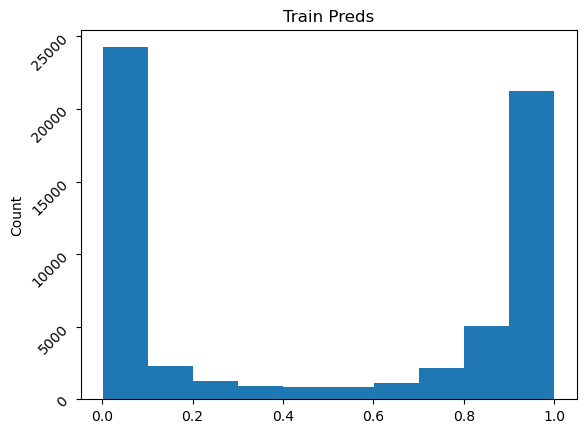

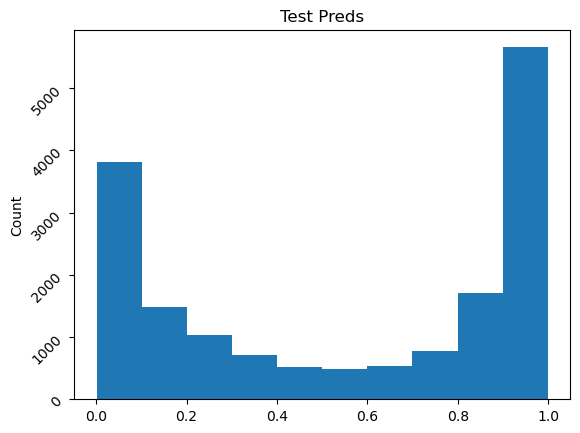

In [42]:
ax = plt.axes()

plt.hist(train_preds);
ax.set_title('Train Preds')
ax.set_ylabel('Count')
plt.yticks(rotation=45)

plt.show();

ax = plt.axes()

plt.hist(test_preds);
ax.set_title('Test Preds');
ax.set_ylabel('Count');
plt.yticks(rotation=45);

plt.show();